In [1]:
from datasets import Dataset

def my_gen():
    f1 = open("labeled_data_sentences.txt", "r")
    f2 = open("labeled_data_labels.txt", "r")

    sentences = f1.readlines()
    labels = f2.readlines()

    for i in range(len(sentences)):
        yield {"text": sentences[i][:len(sentences[i])-1],
               "label": labels[i][:len(labels[i])-1]}

In [2]:
dataset = Dataset.from_generator(my_gen)

Found cached dataset generator (C:/Users/Jonathan Ipe/.cache/huggingface/datasets/generator/default-a52d2eba600dcdeb/0.0.0)


In [3]:
dataset = dataset.class_encode_column("label")

Loading cached processed dataset at C:\Users\Jonathan Ipe\.cache\huggingface\datasets\generator\default-a52d2eba600dcdeb\0.0.0\cache-7ab10ce251b09a87.arrow


In [4]:
dataset[101]

{'text': '¯ï¯¯¯°¯¯ ¯į¯¯į¯¯¯ ¯¯į¯į¯¯¯ ¯¯¯¯ï¯¯¯ ¯¯¯¯¯±¯¯ ¯¯¯¯¯³¯¯ ¯¯¯¯¯±¯¯ ¯¯¯¯¯°¯¯ ¯¯į¯į¯¯¯ ¯¯¯¯ï¯¯¯ ¯¯¯°Ï¯¯¯ ¯¯Ï¯¯¯¯¯ ¯¯±¯¿¯¯¯ ¯¯¯¯ï¯¯¯ ¯¯±¯¯±¯¯ ¯¯Ï¯¯¯¯¯ ¯¯·¯¯¯¯¯ ¯¯Ï¯¯¯¯¯ ¯¯±¯¯·¯¯ ¯¯Ï¯¯¯¯¯ ¯¯·¯¯³¯¯ ¯¯Ï¯¯±¯¯ ¯¯³¯¯°¯¯ ¯¯Ï¯¯¯¯¯ ¯¯¿¯¯¯¯¯ ¯¯Ï¯¯¯¯¯ ¯¯³¯¯¯¯¯ ¯¯Ï¯¯¯¯¯ ¯¯¿¯ï¯¯¯ ¯¯Ï¯¯¯¯¯ ¯¯°¯¯³¯¯ ¯¯Ï¯¯¯¯¯ ¯¯³¯¯¯¯¯ ¯¯Ï¯¯¯¯¯ ¯¯°¯¯¿¯¯ ¯¯Ó¯¯·¯¯ ¯¯Ï¯¯³¯¯ ¯¯±¯¯·¯¯ ¯¯Ï¯¯¯¯¯ ¯¯·¯¯¯¯¯ ¯¯Ï¯¯¯¯¯ ¯¯±¯¯¯¯¯ ¯¯Ï¯¯¯¯¯ ¯¯·¯ï¯¯¯ ¯¯Ï¯¯¯¯¯ ¯¯÷¯¯¯¯¯ ¯¯·¯±´¯¯ ¯¯·¯ï¯¯¯ ¯¯¯¯¯Ï¯¯ ¯¯¯¯¯¿¯¯ ¯¯¯¯¯·¯¯ ¯¯¯¯¯³¯¯ ¯¯¯¯¯±¯¯ ¯¯¯¯¯°¯¯ ¯¯¯¯¯±¯¯ ¯¯¿¯į¯¯¯ ¯¯¯·¯¯¯¯ ¯¯·¯¯±¯¯ ¯¯¯³¯¯¯¯ ¯¯³¯¯³¯¯ ¯¯¯±¯¯¯¯ ¯¯±¯¯·¯¯ ¯¯¯°¯¯¯¯ ¯¯³¯¯¯¯¯',
 'label': 3}

In [5]:
from transformers import AutoTokenizer, RobertaTokenizerFast

tokenizer = RobertaTokenizerFast.from_pretrained("BPEtokenizer", max_len=512)

In [6]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

In [7]:
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Loading cached processed dataset at C:\Users\Jonathan Ipe\.cache\huggingface\datasets\generator\default-a52d2eba600dcdeb\0.0.0\cache-826c5f30b602752b.arrow


In [8]:
tokenized_datasets = tokenized_datasets.train_test_split(test_size=0.2)
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 32004
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 8001
    })
})

In [ ]:
# small_train_dataset = tokenized_datasets.shuffle(seed=42).select(range(1000))
# small_eval_dataset = tokenized_datasets.shuffle(seed=42).select(range(1000, 1500))

Training

In [9]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("BERT-Pretrained", num_labels=9)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at BERT-Pretrained and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

C:\Temp\ipykernel_27644\2607597888.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [11]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    # predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [21]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="BERT-finetuned",
                                  overwrite_output_dir=True, 
                                  evaluation_strategy="steps",
                                  num_train_epochs=1,
                                  per_device_train_batch_size=8,
                                  per_device_eval_batch_size=8,
                                  eval_steps=250,
                                  logging_steps=250,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
)

In [22]:
train_result = trainer.train()

  0%|          | 0/4001 [00:00<?, ?it/s]

{'loss': 1.473, 'learning_rate': 4.687578105473632e-05, 'epoch': 0.06}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.4664937257766724, 'eval_accuracy': 0.47531558555180603, 'eval_runtime': 71.9587, 'eval_samples_per_second': 111.189, 'eval_steps_per_second': 13.911, 'epoch': 0.06}
{'loss': 1.3836, 'learning_rate': 4.375156210947263e-05, 'epoch': 0.12}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.4849059581756592, 'eval_accuracy': 0.4905636795400575, 'eval_runtime': 70.7281, 'eval_samples_per_second': 113.123, 'eval_steps_per_second': 14.153, 'epoch': 0.12}
{'loss': 1.2876, 'learning_rate': 4.0627343164208945e-05, 'epoch': 0.19}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.5155967473983765, 'eval_accuracy': 0.4759405074365704, 'eval_runtime': 71.5619, 'eval_samples_per_second': 111.805, 'eval_steps_per_second': 13.988, 'epoch': 0.19}
{'loss': 1.2571, 'learning_rate': 3.7503124218945266e-05, 'epoch': 0.25}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.5133440494537354, 'eval_accuracy': 0.485814273215848, 'eval_runtime': 70.2082, 'eval_samples_per_second': 113.961, 'eval_steps_per_second': 14.258, 'epoch': 0.25}
{'loss': 1.183, 'learning_rate': 3.437890527368158e-05, 'epoch': 0.31}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.4227473735809326, 'eval_accuracy': 0.5273090863642045, 'eval_runtime': 70.6766, 'eval_samples_per_second': 113.206, 'eval_steps_per_second': 14.163, 'epoch': 0.31}
{'loss': 1.1415, 'learning_rate': 3.1254686328417895e-05, 'epoch': 0.37}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.319752812385559, 'eval_accuracy': 0.5545556805399325, 'eval_runtime': 69.5737, 'eval_samples_per_second': 115.0, 'eval_steps_per_second': 14.388, 'epoch': 0.37}
{'loss': 1.1814, 'learning_rate': 2.8130467383154213e-05, 'epoch': 0.44}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.269870638847351, 'eval_accuracy': 0.5640544931883514, 'eval_runtime': 67.4128, 'eval_samples_per_second': 118.687, 'eval_steps_per_second': 14.849, 'epoch': 0.44}
{'loss': 1.1507, 'learning_rate': 2.5006248437890527e-05, 'epoch': 0.5}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.2945187091827393, 'eval_accuracy': 0.5546806649168854, 'eval_runtime': 67.2337, 'eval_samples_per_second': 119.003, 'eval_steps_per_second': 14.888, 'epoch': 0.5}
{'loss': 1.1215, 'learning_rate': 2.1882029492626845e-05, 'epoch': 0.56}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.2534981966018677, 'eval_accuracy': 0.5766779152605924, 'eval_runtime': 66.9354, 'eval_samples_per_second': 119.533, 'eval_steps_per_second': 14.955, 'epoch': 0.56}
{'loss': 1.0315, 'learning_rate': 1.8757810547363162e-05, 'epoch': 0.62}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.2179811000823975, 'eval_accuracy': 0.5874265716785402, 'eval_runtime': 71.2846, 'eval_samples_per_second': 112.24, 'eval_steps_per_second': 14.042, 'epoch': 0.62}
{'loss': 1.1135, 'learning_rate': 1.5633591602099477e-05, 'epoch': 0.69}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.218801736831665, 'eval_accuracy': 0.595925509311336, 'eval_runtime': 70.4849, 'eval_samples_per_second': 113.514, 'eval_steps_per_second': 14.202, 'epoch': 0.69}
{'loss': 1.1583, 'learning_rate': 1.2509372656835791e-05, 'epoch': 0.75}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.1493470668792725, 'eval_accuracy': 0.607549056367954, 'eval_runtime': 70.6826, 'eval_samples_per_second': 113.196, 'eval_steps_per_second': 14.162, 'epoch': 0.75}
{'loss': 1.0468, 'learning_rate': 9.385153711572107e-06, 'epoch': 0.81}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.132938027381897, 'eval_accuracy': 0.6136732908386452, 'eval_runtime': 72.9496, 'eval_samples_per_second': 109.679, 'eval_steps_per_second': 13.722, 'epoch': 0.81}
{'loss': 1.1086, 'learning_rate': 6.260934766308422e-06, 'epoch': 0.87}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.1111972332000732, 'eval_accuracy': 0.621172353455818, 'eval_runtime': 67.4498, 'eval_samples_per_second': 118.621, 'eval_steps_per_second': 14.841, 'epoch': 0.87}
{'loss': 1.075, 'learning_rate': 3.136715821044739e-06, 'epoch': 0.94}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.1009174585342407, 'eval_accuracy': 0.6227971503562054, 'eval_runtime': 68.5163, 'eval_samples_per_second': 116.775, 'eval_steps_per_second': 14.61, 'epoch': 0.94}
{'loss': 1.1161, 'learning_rate': 1.2496875781054738e-08, 'epoch': 1.0}


  0%|          | 0/1001 [00:00<?, ?it/s]

{'eval_loss': 1.0859670639038086, 'eval_accuracy': 0.6247969003874516, 'eval_runtime': 74.6635, 'eval_samples_per_second': 107.161, 'eval_steps_per_second': 13.407, 'epoch': 1.0}
{'train_runtime': 1978.7833, 'train_samples_per_second': 16.174, 'train_steps_per_second': 2.022, 'train_loss': 1.1768115947497424, 'epoch': 1.0}


In [23]:
trainer.save_model("BERT-finetuned")

In [32]:
trainer.state.log_history

[{'loss': 1.473,
  'learning_rate': 4.687578105473632e-05,
  'epoch': 0.06,
  'step': 250},
 {'eval_loss': 1.4664937257766724,
  'eval_accuracy': 0.47531558555180603,
  'eval_runtime': 71.9587,
  'eval_samples_per_second': 111.189,
  'eval_steps_per_second': 13.911,
  'epoch': 0.06,
  'step': 250},
 {'loss': 1.3836,
  'learning_rate': 4.375156210947263e-05,
  'epoch': 0.12,
  'step': 500},
 {'eval_loss': 1.4849059581756592,
  'eval_accuracy': 0.4905636795400575,
  'eval_runtime': 70.7281,
  'eval_samples_per_second': 113.123,
  'eval_steps_per_second': 14.153,
  'epoch': 0.12,
  'step': 500},
 {'loss': 1.2876,
  'learning_rate': 4.0627343164208945e-05,
  'epoch': 0.19,
  'step': 750},
 {'eval_loss': 1.5155967473983765,
  'eval_accuracy': 0.4759405074365704,
  'eval_runtime': 71.5619,
  'eval_samples_per_second': 111.805,
  'eval_steps_per_second': 13.988,
  'epoch': 0.19,
  'step': 750},
 {'loss': 1.2571,
  'learning_rate': 3.7503124218945266e-05,
  'epoch': 0.25,
  'step': 1000},
 {'e

In [33]:
with open(, 'w') as f:
    for state in trainer.state.log_history:
        f.write(f"{state}\n")

In [25]:
import matplotlib.pyplot as plt

In [26]:
train_loss_list = []
eval_loss_list = []
eval_acc_list = []
epoch_train_list = []
epoch_eval_list = []


for state in trainer.state.log_history:
    if "loss" in state:
        train_loss_list.append(state["loss"])
        epoch_train_list.append(state["epoch"])
    elif "eval_loss" in state:
        eval_loss_list.append(state["eval_loss"])
        eval_acc_list.append(state["eval_accuracy"])
        epoch_eval_list.append(state["epoch"])

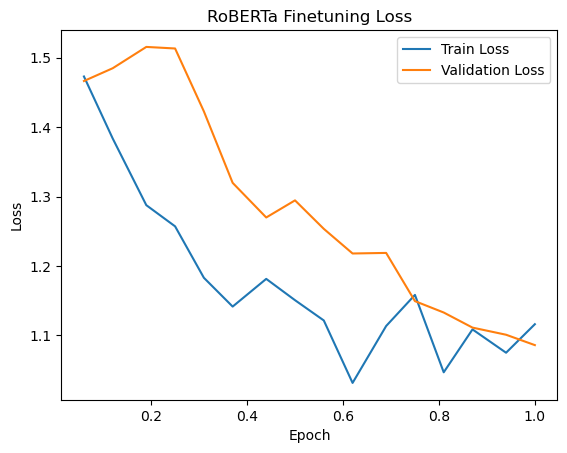

In [27]:
plt.plot(epoch_train_list, train_loss_list)
plt.plot(epoch_eval_list, eval_loss_list)
plt.title("RoBERTa Finetuning Loss")
plt.legend(['Train Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

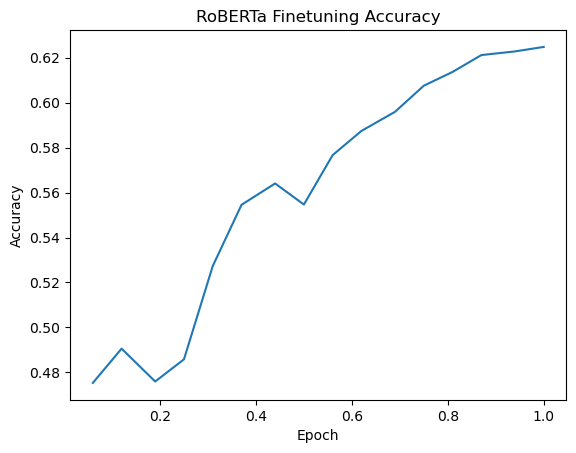

In [28]:
plt.plot(epoch_eval_list, eval_acc_list)
plt.title("RoBERTa Finetuning Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()